In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('assets/data.csv')

In [9]:
df.head()

,CO2,TVOC,PM10,PM2.5,CO,Air Quality,LDR,O3,Temp,Hum,ts
0,592,29,10.30,9.0,352,148,974,623,24.0,47.2,2024-05-22T14:34:1
1,592,29,10.31,10.1,304,136,974,616,23.6,46.8,2024-05-22T14:35:0
2,592,29,4.08,9.9,284,117,974,603,23.5,47.8,2024-05-22T14:36:3
3,592,29,7.86,9.6,266,114,323,599,23.3,47.1,2024-05-22T14:37:1
4,592,29,6.84,8.4,260,116,307,601,23.0,47.1,2024-05-22T14:38:0


In [26]:
df.shape

(589876, 11)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589876 entries, 0 to 589875
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CO2          589876 non-null  int64  
 1   TVOC         589876 non-null  int64  
 2   PM10         589876 non-null  float64
 3   PM2.5        589876 non-null  float64
 4   CO           589876 non-null  int64  
 5   Air Quality  589876 non-null  int64  
 6   LDR          589876 non-null  int64  
 7   O3           589876 non-null  int64  
 8   Temp         589876 non-null  float64
 9   Hum          589876 non-null  float64
 10  ts           589876 non-null  object 
dtypes: float64(4), int64(6), object(1)
memory usage: 49.5+ MB


In [16]:
df.describe()

,CO2,TVOC,PM10,PM2.5,CO,Air Quality,LDR,O3,Temp,Hum
count,589876.000000,589876.000000,589876.000000,589876.000000,589876.000000,589876.000000,589876.000000,589876.000000,589876.000000,589876.000000
mean,596.062072,50.830058,43.469934,18.473955,408.533092,113.971184,895.096527,634.037476,26.356252,45.179883
std,683.037810,465.210328,379.081430,42.088928,119.226035,53.524384,165.804552,66.548247,3.202987,6.695668
min,-32195.000000,-32754.000000,2.500000,0.000000,109.000000,24.000000,8.000000,435.000000,19.300000,24.500000
25%,419.000000,45.000000,5.010000,6.200000,326.000000,66.000000,915.000000,590.000000,24.200000,41.600000
50%,439.000000,50.000000,7.570000,11.500000,407.000000,95.000000,932.000000,632.000000,25.800000,45.100000
75%,481.000000,60.000000,10.130000,20.600000,487.000000,161.000000,945.000000,679.000000,27.900000,48.700000
max,5000.000000,1098.000000,17566.980000,1537.680000,885.000000,373.000000,1000.000000,937.000000,42.800000,85.900000


### Data explaining :
- `CO2`: Carbon dioxide concentration (ppm – parts per million).
- `TVOC`: Total Volatile Organic Compounds (ppb – parts per billion).
- `PM10`: Particulate Matter with a diameter of 10 micrometers or less (µg/m³).
- `PM2.5`: Fine Particulate Matter with a diameter of 2.5 micrometers or less (µg/m³).
- `CO`: Carbon monoxide concentration (likely in ppm or ppb).
- `Air` Quality: Air quality index or score (higher values might indicate worse air quality).
- `LDR`: Light Dependent Resistor reading (indicates light intensity).
- `O3`: Ozone concentration (likely in ppb).
- `Temp`: Temperature (°C).
- `Hum`: Humidity (%).
- `ts`: Timestamp (date and time of data collection).


## Data preprocessing:

### outlier detection

In [21]:
# List of numerical columns (excluding 'ts' since it's a timestamp)
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

In [22]:
# Detect outliers using IQR
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

In [23]:
IQR

CO2             62.00
TVOC            15.00
PM10             5.12
PM2.5           14.40
CO             161.00
Air Quality     95.00
LDR             30.00
O3              89.00
Temp             3.70
Hum              7.10
dtype: float64

In [43]:
# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [44]:
# Find outliers (values outside the range)
outliers = ((df[num_cols] < lower_bound) | (df[num_cols] > upper_bound))

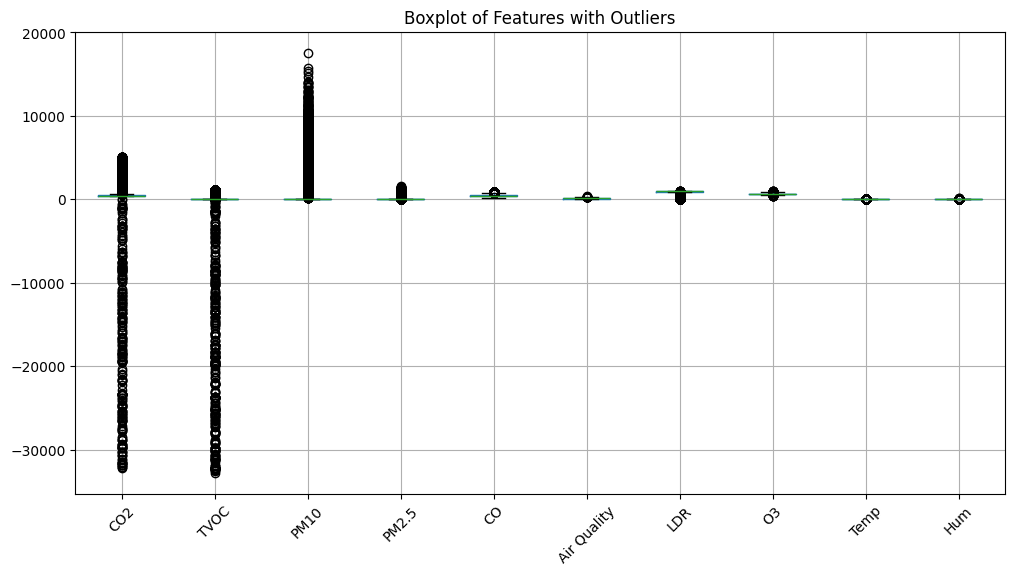

In [45]:
# Draw boxplots
plt.figure(figsize=(12, 6))
df[num_cols].boxplot(rot=45)
plt.title("Boxplot of Features with Outliers")
plt.show()

In [46]:
# Remove outliers
df2 = df[~outliers.any(axis=1)]  # Keep only non-outlier rows

In [47]:
df.shape[0] - df2.shape[0]

227789

- 227789 rows detected as outlier, I think they are meannigfull and not anomlies
- Now, we need here Domain Knowledge and Business Logic to know if this portion of data is really outlier or not .

In [ ]:
df[outliers.any(axis=1)].head(10)  # Show first 10 outliers

,CO2,TVOC,PM10,PM2.5,CO,Air Quality,LDR,O3,Temp,Hum,ts
0,592,29,10.30,9.0,352,148,974,623,24.0,47.2,2024-05-22T14:34:1
1,592,29,10.31,10.1,304,136,974,616,23.6,46.8,2024-05-22T14:35:0
2,592,29,4.08,9.9,284,117,974,603,23.5,47.8,2024-05-22T14:36:3
3,592,29,7.86,9.6,266,114,323,599,23.3,47.1,2024-05-22T14:37:1
4,592,29,6.84,8.4,260,116,307,601,23.0,47.1,2024-05-22T14:38:0
5,592,29,6.16,6.8,269,103,968,598,26.8,44.2,2024-05-22T14:59:1
6,592,29,11.92,6.9,224,92,975,582,26.6,44.3,2024-05-22T15:10:0
7,503,15,3.52,7.3,219,97,975,583,26.3,43.2,2024-05-22T15:11:0
8,447,7,5.65,7.6,215,95,974,577,26.4,42.9,2024-05-22T15:12:0
9,827,65,4.02,6.7,248,101,975,574,26.8,42.2,2024-05-22T15:20:2


In [ ]:
# Compute outlier severity score (distance from nearest bound)
def compute_outlier_score(row):
    score = 0
    for col in num_cols:
        if row[col] < lower_bound[col]:  # Below lower bound
            score += abs(row[col] - lower_bound[col])
        elif row[col] > upper_bound[col]:  # Above upper bound
            score += abs(row[col] - upper_bound[col])
    return score

# Apply the function to compute scores
df["Outlier_Score"] = df.apply(compute_outlier_score, axis=1)

# Extract and sort the worst 10 outliers
worst_outliers = df[df["Outlier_Score"] > 0].sort_values(by="Outlier_Score", ascending=False).head(10)

In [52]:
worst_outliers

,CO2,TVOC,PM10,PM2.5,CO,Air Quality,LDR,O3,Temp,Hum,ts,Outlier_Score
286244,-30242,-31189,5307.70,649.44,430,80,789,745,23.7,49.4,2024-12-31T21:07:1,67757.63
294147,-31583,-32277,1608.43,133.70,448,96,41,826,23.4,41.4,2025-01-06T09:01:1,66733.12
498425,-31846,-32206,7.08,6.00,462,86,74,726,24.2,73.5,2024-11-04T07:30:0,65210.65
567885,-32195,-32561,5.65,22.90,336,71,890,692,28.0,41.5,2024-12-22T15:09:0,65104.50
566342,-32065,-32447,12.11,20.80,369,83,895,803,26.4,37.0,2024-12-21T13:26:2,64860.50
548924,-32041,-32447,3.86,11.70,436,88,910,740,23.4,51.8,2024-12-09T10:36:5,64836.50
508487,-31828,-32236,3.95,3.30,557,91,931,804,25.0,63.5,2024-11-11T07:25:0,64416.65
500649,-31822,-32185,9.82,6.70,278,73,939,617,24.5,61.9,2024-11-05T20:36:2,64358.05
589085,-31583,-32277,9.53,32.00,448,96,884,826,23.4,41.4,2025-01-06T09:01:1,64222.00
501636,-31553,-32304,7.96,20.60,430,87,938,701,23.2,61.4,2024-11-06T13:03:0,64207.55


- Quetion to be asked to Domain , is these outliers ??!

### Normalizing